In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TrainData1.txt', sep='\s+', header = None)
labels = pd.read_csv('TrainLabel1.txt', header=None, names=['target'])
df['target'] = labels['target']

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3303,3304,3305,3306,3307,3308,3309,3310,3311,target
0,3.824254,1.923762,1.918450,2.352067e+00,3.117298,3.051735,3.307977,3.430222e+00,3.586667,3.605218,...,1.855640,1.142389,2.054345,2.808224,1.782186,2.665703,2.468214,2.478581,2.308842,1
1,3.904190,2.309524,2.152930,1.000000e+99,3.532368,3.524866,3.677791,3.636671e+00,3.696868,3.716764,...,1.442323,1.000000,2.127914,2.979658,1.961089,2.519027,2.054383,2.689903,2.090928,1
2,3.750908,1.161068,1.017033,2.347993e+00,3.381889,3.393096,3.509134,3.512466e+00,3.622203,3.603050,...,1.584105,1.000000,1.945321,3.257004,1.965061,2.536066,1.449324,2.605230,1.368659,2
3,3.809383,1.912355,1.856940,2.498944e+00,3.289406,3.371232,3.541995,1.000000e+99,3.473179,3.628930,...,1.481658,1.000000,2.155032,3.270371,1.928473,2.618074,2.154013,2.530046,2.185514,1
4,3.893561,2.094192,1.881271,2.785707e+00,3.344339,3.274417,3.485872,3.516527e+00,3.642358,3.688235,...,1.510545,1.000000,2.094192,3.246666,1.824516,2.562317,1.942256,2.598517,1.764624,1


In [4]:
df['target'].value_counts()

target
1    108
2     14
4     14
3     11
5      3
Name: count, dtype: int64

In [5]:
missing_mask = df == 1e99
print(max(df[missing_mask].count()))

12


In [6]:
def data_quality_report(df):
    report_data = []
    for i, column in enumerate(df.columns, 1):
        data = df[column]
        
        # Replace 1e99 with NaN for calculations
        data_clean = data.replace(1e99, np.nan)
        
        # Calculate statistics
        count = len(data)
        missing = (data == 1e99).sum()
        missing_percentage = (missing / count) * 100
        cardinality = data_clean.nunique()
        min_val = data_clean.min()
        q1 = data_clean.quantile(0.25)
        median = data_clean.median()
        q3 = data_clean.quantile(0.75)
        max_val = data_clean.max()
        mean = data_clean.mean()
        std_dev = data_clean.std()
        
        report_data.append({
            'Feature No.': i,
            'Count': count,
            '% of Missing': round(missing_percentage, 2),
            'Cardinality': cardinality,
            'Min.': min_val,
            'Q1': q1,
            'Median': median,
            'Q3': q3,
            'Max.': max_val,
            'Mean': mean,
            'Std. Dev.': std_dev
        })
    
    # Create a DataFrame from the collected data
    report_df = pd.DataFrame(report_data)
    
    return report_df

# Assuming your original DataFrame is named 'df'
quality_report_df = data_quality_report(df)

quality_report_df

,Feature No.,Count,% of Missing,Cardinality,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,1,150,1.33,148,3.719071,3.821437,3.852210,3.887575,3.972624,3.854181,0.047895
1,2,150,0.67,144,1.000000,1.621176,1.948902,2.171507,2.695455,1.889142,0.392483
2,3,150,1.33,147,1.000000,1.701135,1.893078,2.092175,2.618947,1.878274,0.304658
3,4,150,1.33,148,1.794627,2.290752,2.439439,2.601036,2.966395,2.448697,0.228352
4,5,150,2.00,147,2.705282,3.259093,3.365076,3.458025,3.719680,3.346161,0.180362
...,...,...,...,...,...,...,...,...,...,...,...
3308,3309,150,0.67,149,2.272538,2.501402,2.585771,2.635926,2.800105,2.574772,0.107060
3309,3310,150,2.67,96,1.000000,1.000000,1.703076,2.056074,2.903432,1.626223,0.534463
3310,3311,150,3.33,145,1.627263,2.315708,2.540448,2.670543,3.084301,2.483057,0.288346
3311,3312,150,1.33,148,1.194792,1.945456,2.094122,2.219631,2.575834,2.061617,0.232559


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns     

In [8]:
df = df.replace(1e99, np.nan)

# Calculate the median for each column, excluding NaN values
column_medians = df.median()

# Fill NaN values with the median of each respective column
df = df.fillna(column_medians)

In [9]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Get the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components that explain, say, 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

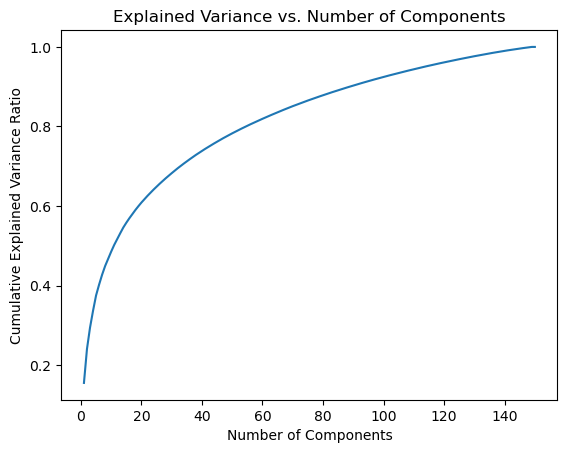

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [13]:
pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(X_pca_final.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,-2.121651,-17.450402,-18.083074,6.612195,-1.765835,10.787115,3.256995,6.101471,10.205070,6.857708,...,2.899458,-2.240586,0.835772,0.601294,0.089665,-3.238181,-5.632387,-0.848539,-0.367707,-6.204676
1,-19.735603,-5.608678,-3.647338,2.139818,8.827800,-5.776479,-5.640168,-4.469021,6.287317,7.390679,...,1.452212,-2.884070,4.869477,-2.624423,-1.525067,4.512698,0.675934,-1.416704,6.321478,-5.011856
2,-26.461902,-21.979992,17.240397,4.799691,4.763987,-8.565170,7.007220,-0.172116,-15.858156,5.660201,...,-2.171156,2.537849,-2.885740,-2.194841,-7.477192,2.504691,-0.039767,-2.140237,-0.814952,-0.222264
3,-2.180458,13.255719,-10.013429,-1.175154,-2.953317,1.303227,-18.800196,8.789285,-7.062093,1.262483,...,-1.802969,5.040739,-1.687142,1.228261,0.286652,0.021237,-1.175691,-1.320146,1.799646,4.398773
4,-18.958274,-1.463080,6.740252,0.004288,-14.782177,-4.644684,-6.667188,-6.332227,1.118110,-5.081216,...,2.854216,3.811907,-1.318794,-0.585355,-2.227020,5.753580,-1.391659,-3.030092,-4.982463,0.103869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,15.832544,-0.355812,-22.235932,-6.162130,-13.513521,-5.547293,12.136588,-6.639850,-1.984521,-3.691051,...,2.329271,1.438666,-1.724333,-0.941594,-2.254668,-0.388919,-0.153695,-5.829076,-4.278207,-3.230524
146,6.154370,8.561508,-6.223076,-5.240168,0.311858,6.768773,10.700094,-3.473868,-0.662337,-3.827464,...,-2.533906,3.382309,0.819750,3.048755,-4.087145,1.576068,-2.264085,-0.825898,-0.747056,-5.087691
147,0.711806,18.779588,-12.075602,4.170337,14.425459,12.027608,3.134561,-3.773728,-5.493175,2.603624,...,-3.356559,0.304916,0.292128,3.849687,2.028441,0.502512,4.666222,0.840300,0.016352,0.196158
148,45.099672,-15.221700,25.045347,3.011482,7.103790,-18.351913,-2.096308,3.849445,-4.996308,-0.669762,...,-0.416572,7.504892,-4.096686,-0.922848,-2.216464,7.859520,2.387182,2.811143,-0.100287,1.075225


In [14]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, train_size=0.7, random_state=42, stratify=y)

X_train.shape, X_test.shape

((105, 70), (45, 70))

In [15]:
from imblearn.over_sampling import SMOTE
# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

Original training set class distribution:
(array([1, 2, 3, 4, 5]), array([75, 10,  8, 10,  2]))


In [16]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution in the resampled training set
print("Resampled training set class distribution:")
print(np.unique(y_train, return_counts=True))

Resampled training set class distribution:
(array([1, 2, 3, 4, 5]), array([75, 75, 75, 75, 75]))


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear','sigmoid']
}

# Create an SVM classifier
svm = SVC(random_state=42)

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [18]:
# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 score (macro average)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Calculate precision (macro average)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (macro): {precision:.4f}")

# Calculate recall (macro average)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (macro): {recall:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9111
F1 Score (macro): 0.6660
Precision (macro): 0.7429
Recall (macro): 0.6606

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.97      0.94        33
           2       0.80      1.00      0.89         4
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1

    accuracy                           0.91        45
   macro avg       0.74      0.66      0.67        45
weighted avg       0.90      0.91      0.89        45



/Users/rijulmehta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rijulmehta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rijulmehta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rijulmehta/anaconda

In [19]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# # Step 1: Define the parameter grid for XGBoost
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Step 2: Create the XGBoost classifier
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Step 3: Perform Grid Search
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
#                            cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# # Step 4: Fit the Grid Search to the training data
# grid_search.fit(X_train, y_train)

# # Step 5: Get the best model
# best_xgb = grid_search.best_estimator_

# # Step 6: Print the best parameters
# print("Best parameters:", grid_search.best_params_)

# # Step 7: Make predictions on the test set
# y_pred = best_xgb.predict(X_test)

# # Step 8: Calculate and print various metrics
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')

# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score (macro): {f1:.4f}")
# print(f"Precision (macro): {precision:.4f}")
# print(f"Recall (macro): {recall:.4f}")

# # Step 9: Print detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

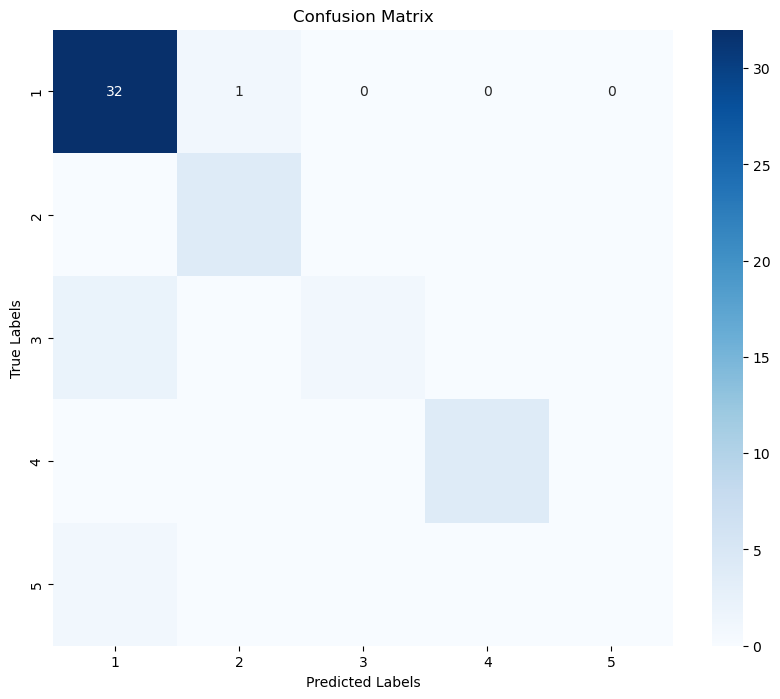

array([[32,  1,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 2,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0,  0]])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Step 3: Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
cm